<a href="https://colab.research.google.com/github/saubhagyav/Book_Recommendation_System/blob/main/Individual_Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement:**
During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).
Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.

In [133]:
# Importing Libraries:- 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
# Paths of the datasets provided to me.
user = '/content/drive/MyDrive/Alma Better/Capstone Projects/Book_Recommendation_System-Saubhagya_Verma/Copy of Users.csv'
books = '/content/drive/MyDrive/Alma Better/Capstone Projects/Book_Recommendation_System-Saubhagya_Verma/Copy of Books.csv'
ratings = '/content/drive/MyDrive/Alma Better/Capstone Projects/Book_Recommendation_System-Saubhagya_Verma/Copy of Ratings.csv'

In [135]:
df_user = pd.read_csv(user)
df_books = pd.read_csv(books)
df_ratings = pd.read_csv(ratings)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# **Informations about the 3 datasets provided to us for this project:-**
## The Book-Crossing dataset comprises 3 files.

## **1. Users** 

### Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

## **2. Books**

### Books are identified by their respective ISBN. Invalid ISBNs have already been removedfrom the dataset. Moreover, some content-based information is given (Book-Title,Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

## **3. Ratings**

### Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

In [136]:
df_user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [137]:
df_user.shape

(278858, 3)

In [138]:
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [139]:
df_books.shape

(271360, 8)

In [140]:
df_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [141]:
df_ratings.shape

(1149780, 3)

# **Dropping Insignificant Columns from df_books :-**

In [142]:
#dropping last three columns containing image URLs which will not be required for analysis

df_books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [143]:
df_books.shape

(271360, 5)

# **Calculating the number of null values in the three Datasets:-**

In [144]:
df_user.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [145]:
df_books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [146]:
df_ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

# **EDA on the Three Datasets:-** 

In [147]:
df_ratings['Book-Rating'].value_counts()

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'The Ratings')

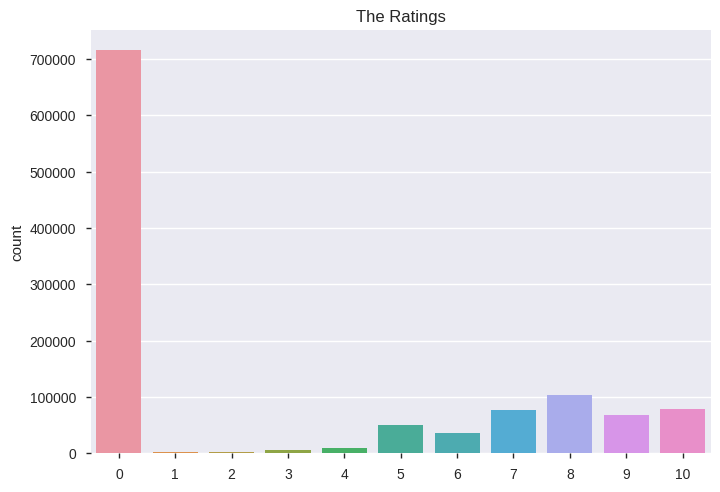

In [148]:
sns.countplot(df_ratings['Book-Rating'].values).set_title('The Ratings')

# **Forming the Final Dataset by merging the above three Datasets:-** 

In [149]:
df_new = pd.merge(df_user, df_ratings, how='inner', on='User-ID')
df_new.head()

,User-ID,Location,Age,ISBN,Book-Rating
0,2,"stockton, california, usa",18.0,0195153448,0
1,7,"washington, dc, usa",NaN,034542252,0
2,8,"timmins, ontario, canada",NaN,0002005018,5
3,8,"timmins, ontario, canada",NaN,0060973129,0
4,8,"timmins, ontario, canada",NaN,0374157065,0


In [150]:
df_new.shape

(1149780, 5)

In [151]:
df_new = df_new.merge(df_books, on='ISBN')
df_new.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,11400,"ottawa, ontario, canada",49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
3,11676,"n/a, n/a, n/a",NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
4,41385,"sudbury, ontario, canada",NaN,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


# **Removing Unwanted Values from the Dataset:-**

In [152]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1031136 non-null  int64  
 1   Location             1031136 non-null  object 
 2   Age                  753301 non-null   float64
 3   ISBN                 1031136 non-null  object 
 4   Book-Rating          1031136 non-null  int64  
 5   Book-Title           1031136 non-null  object 
 6   Book-Author          1031135 non-null  object 
 7   Year-Of-Publication  1031136 non-null  object 
 8   Publisher            1031134 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 78.7+ MB


### **Here the Year-Of-Publication is in object Dtype, it should ideally be in  numeric Dtype. Let us explore this feature a bit more.**

## 1. **Cleaning the Feature - Year of Publication:-**

In [153]:
# Visually inspecting this feature by observing it's unique values.
df_new['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1987, 1989, 1992, 1983, 1979, 1995, 1982, 1985, 1986,
       1978, 1980, 1952, 1990, 1981, 0, 1984, 1968, 1961, 1959, 1946,
       1974, 1958, 1976, 1971, '2002', 1977, 1975, 1965, 1941, 1970,
       '1996', '1999', 1972, '1989', '1992', '2001', 1953, 1962, 1973,
       '2004', 1960, '1997', '2000', '0', 1954, 1966, 1920, '1998',
       '2003', 1967, 1956, 1942, 1955, 1951, 1969, 1948, '1977', '1990',
       '1986', '1994', '1982', 1963, 1964, '1995', '1959', '1988', 1950,
       '1991', '1984', 2005, 1943, '1993', '1987', '1983', '1981', 1957,
       '1972', '1980', 1937, 1940, '1965', '1970', '1979', 1930, 1923,
       1945, 1947, '1976', 1936, '1985', '1978', 1925, '1966', '1958',
       '1975', '1973', 1927, '1974', '1967', '1971', '1969', 2030, '1968',
       2011, '1960', '1964', 2020, 1939, 1926, 1938, '1961', 1911, 1904,
       1949, 1932, 1929, '1953', '1963', '1955', '1944', '1920', '1

# **Observation:-** We can clearly see that their are some noice values in the Year of Publication features :-
### 1. **String Noice Values -** such as 'DK Publishing Inc' and 'Gallimard.
### 2. **Integer Noice Values -** Since this data was collected in august 2004, so any year value greater than 2004 is a noice value.

In [154]:
# Casting Year-Of-Publication to numeric datatype and removing all String Noice Values using coerce functionality.

df_new['Year-Of-Publication'] = pd.to_numeric(df_new['Year-Of-Publication'], 'coerce')

In [155]:
# Cross checking the column to check if the string based noice values are removed or not.
df_new['Year-Of-Publication'].unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1987., 1989., 1992., 1983., 1979.,
       1995., 1982., 1985., 1986., 1978., 1980., 1952., 1990., 1981.,
          0., 1984., 1968., 1961., 1959., 1946., 1974., 1958., 1976.,
       1971., 1977., 1975., 1965., 1941., 1970., 1972., 1953., 1962.,
       1973., 1960., 1954., 1966., 1920., 1967., 1956., 1942., 1955.,
       1951., 1969., 1948., 1963., 1964., 1950., 2005., 1943., 1957.,
       1937., 1940., 1930., 1923., 1945., 1947., 1936., 1925., 1927.,
       2030., 2011., 2020., 1939., 1926., 1938., 1911., 1904., 1949.,
       1932., 1929., 1944., 1933., 1922., 1897., 2050., 1902., 1924.,
       1921., 1900., 2038., 2010., 1928., 2006., 1901., 2026., 2021.,
       1931., 1378., 1908.,   nan, 1909., 2012., 2008., 1935., 1376.,
       2037., 1906., 1806., 1917., 1919., 1914., 1934., 1910., 2024.])

In [156]:
# Removing all the integer Noice Values from the Dataset.
df_new = df_new[(df_new['Year-Of-Publication']<=2004) & (df_new['Year-Of-Publication']!= 0)]
df_new.head(2)

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada


In [157]:
df_new['Year-Of-Publication'].unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1987., 1989., 1992., 1983., 1979.,
       1995., 1982., 1985., 1986., 1978., 1980., 1952., 1990., 1981.,
       1984., 1968., 1961., 1959., 1946., 1974., 1958., 1976., 1971.,
       1977., 1975., 1965., 1941., 1970., 1972., 1953., 1962., 1973.,
       1960., 1954., 1966., 1920., 1967., 1956., 1942., 1955., 1951.,
       1969., 1948., 1963., 1964., 1950., 1943., 1957., 1937., 1940.,
       1930., 1923., 1945., 1947., 1936., 1925., 1927., 1939., 1926.,
       1938., 1911., 1904., 1949., 1932., 1929., 1944., 1933., 1922.,
       1897., 1902., 1924., 1921., 1900., 1928., 1901., 1931., 1378.,
       1908., 1909., 1935., 1376., 1906., 1806., 1917., 1919., 1914.,
       1934., 1910.])

In [161]:
# The percentage of Data lost while cleaning the Year-of_publication Feature.
percentage_of_data_lost = (1031136 - df_new.shape[0])*100/1031136
percentage_of_data_lost

1.3788675790584366

# **Therefore, after cleaning the dataset based upon Year-Of-Publication Feature, we lost only a miniscule amount of 1.3% data.**

## **2. Cleaning the Feature - Book Rating :-**

## **Reasons for Eliminating the zero Rating:-** 

### 1. Since zero is not explicitly defined by users for rating the books, it doesn't provide much info regarding the user satisfaction from the book.

### 2. In real life aswell, most of the books sold on amazon don't get rated by the users and it's evident from the count of zero ratings in the count plot.

### **We need data to make recommendations to users only when we have effective insights about them.**

In [163]:
# Size of dataset rows before the cleaing operation.
df_before_size = df_new.shape[0]
df_before_size

1016918

In [164]:
# Removing all the implicit values as they aren't explicitly refered to as ratings.
df_new = df_new[df_new['Book-Rating']>0]

# Size of dataset rows after the cleaing operation.
df_after_size = df_new.shape[0]
df_after_size

377973

In [165]:
# Percentage of Data lost while cleaning the Book Rating Feature.
percentage_of_0_data_lost = (df_before_size- df_after_size)*100/df_before_size
percentage_of_0_data_lost

62.831516405452554

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'The Ratings')

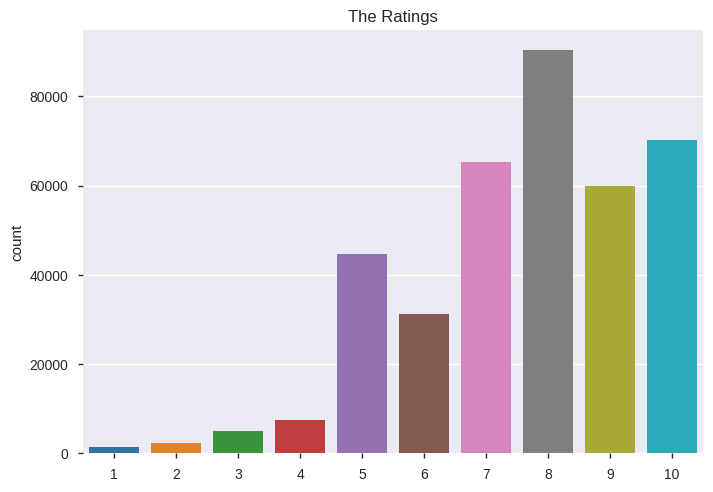

In [166]:
# Visualizing the Book Ratings after removing the implicit value '0':-
sns.countplot(df_new['Book-Rating'].values).set_title('The Ratings')

# **Therefore, after cleaning the dataset based upon Book-Rating Feature, we lost a large amount of our data. We lost almost 63% of values from our dataset.**

## **3. Cleaning the Feature - Age :-**

In [179]:
# Size of dataset rows before the cleaing operation.
df_size_before_removing_age_outliers = df_new.shape[0]
df_size_before_removing_age_outliers

377973

In [192]:
# Setting Age Threshold as 90 years as any person beyond this age won't have the mental capacity to properly review a book.
df_new['Age'] = np.where(df_new['Age']>90, None, df_new['Age'])
df_new[df_new['Age'].isna()].shape[0]
df_new = df_new[~df_new['Age'].isna()]
df_new.head(2)

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
5,67544,"toronto, ontario, canada",30,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
13,219008,"halifax, nova scotia, canada",60,0002005018,7,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada


In [193]:
# Size of dataset rows after the cleaing operation.
df_size_after_removing_age_outliers = df_new.shape[0]
df_size_after_removing_age_outliers

264556

In [194]:
# Percentage of Data lost while cleaning the Age Feature.
percentage_of_data_lost_after_removing_age_outliers = (df_size_before_removing_age_outliers- df_size_after_removing_age_outliers)*100/df_size_before_removing_age_outliers
percentage_of_data_lost_after_removing_age_outliers

30.006640685974926

## **Therefore, after removing the outlers from the age column, we are left with around 2.6 lakh rows of data. We lost nearly 30% of the values during this operation.**


## **Let us have a look at the null values left in the dataeset.**

In [196]:
# Checking the null values in the dataset:-
df_new.isnull().sum()

User-ID                0
Location               0
Age                    0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [201]:
# Removing the 3 null values from the dataset to get the final cleaned Dataset:- 
df_new.dropna(inplace=True)

# Re-checking the number of null values in the dataset:-
df_new.isnull().sum()

User-ID                0
Location               0
Age                    0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [205]:
# Creating a copy to get the final dataframe for building my nearest neighbour based recommendation model.
df_final = df_new.copy()

# Cross-checking the shape of the final_dataset.
df_final.shape, df_new.shape

((264553, 9), (264553, 9))

# **Defining the Correct User**:-

### We can't take every user's rating at facevalue because if the user is a novice reader with only an experience of reading a couple of books, his/her ratings might not be much relevant for finding similarity among books.

### **Therefore as a general rule of thumb we choosing only those User's who have rated atleast 10 Books for builing the recommendation system.**

In [206]:
counts1 = df_new['User-ID'].value_counts()
df1= df_new[df_new['User-ID'].isin(counts1[counts1 >= 10].index)].reset_index()
df1.drop(columns='index', inplace=True)

In [207]:
df1.shape

(190927, 9)

In [169]:
# counts1 = df_new['Book-Title'].value_counts()
# df1= df_new[df_new['Book-Title'].isin(counts1[counts1 > 8].index)].reset_index()
# df1.drop(columns='index', inplace=True)

In [171]:
df_new2 = df1.groupby(['Book-Title','Publisher']).mean('Book-Rating').reset_index()
df_new2.head(2)

,Book-Title,Publisher,User-ID,Age,Book-Rating,Year-Of-Publication
0,'Salem's Lot,Doubleday Books,167185.375,36.166667,7.375,1993.0
1,'Salem's Lot,Pocket,189835.000,NaN,5.000,2000.0


In [172]:
df_new2['Book-Rating'].value_counts()

8.000000     949
7.000000     659
9.000000     524
10.000000    365
7.500000     301
            ... 
7.719626       1
7.503676       1
7.815789       1
4.900000       1
7.567568       1
Name: Book-Rating, Length: 1375, dtype: int64

In [173]:
df_new2.dropna(inplace=True)

In [ ]:
df_new2.isnull().sum()

Book-Title     0
Publisher      0
User-ID        0
Age            0
Book-Rating    0
dtype: int64

In [170]:
df_new.drop(columns=['ISBN',	'Book-Author',	'Year-Of-Publication',	'Publisher','Age','Location'], inplace=True)

# **Recommending Books Based Upon Publishers:-**

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [ ]:
# Recommending Books Based Upon Publishers:-
@interact
def recommend_books_based_upon_publishers( publishers = list(df_new2['Publisher'].value_counts().index)):
  a = df_new2[df_new2['Publisher']==publishers][['Book-Title', 'Book-Rating']]
  a = a.sort_values(by = 'Book-Rating', ascending=False)
  return a.head(5)


interactive(children=(Dropdown(description='publishers', options=('Ballantine Books', 'Pocket', 'Bantam Books'…

In [ ]:
df_new['Book-Title'].value_counts()

The Lovely Bones: A Novel                                                                          707
Wild Animus                                                                                        581
The Da Vinci Code                                                                                  494
The Secret Life of Bees                                                                            406
The Nanny Diaries: A Novel                                                                         393
                                                                                                  ... 
Oxycise!                                                                                             1
The Periodic Kingdom: A Journey into the Land of the Chemical Elements (Science Masters Series)      1
Encyclopedia of the Third Reich                                                                      1
Fun With Woody: The Complete Woody Allen Quiz Book                       

In [ ]:
df_new.drop(columns=['ISBN',	'Book-Author',	'Year-Of-Publication',	'Publisher','Age','Location'], inplace=True)

In [ ]:
counts1 = df_new['Book-Title'].value_counts()
df1= df_new[df_new['Book-Title'].isin(counts1[counts1 > 8].index)].reset_index()
df1.drop(columns='index', inplace=True)

In [ ]:
df1

,User-ID,Book-Rating,Book-Title
0,8,5,Clara Callan
1,11676,8,Clara Callan
2,67544,8,Clara Callan
3,116866,9,Clara Callan
4,123629,9,Clara Callan
...,...,...,...
166775,276556,10,The Brothers K
166776,276563,10,The Cat Who Went to Heaven
166777,277157,5,Saving Faith
166778,277563,5,Last Man Standing


In [ ]:
len(df1['User-ID'].unique())

43684

In [ ]:
Books_counts = pd.DataFrame(df_new['Book-Title'].value_counts()).reset_index()
Books_counts.head()

,index,Book-Title
0,The Lovely Bones: A Novel,707
1,Wild Animus,581
2,The Da Vinci Code,494
3,The Secret Life of Bees,406
4,The Nanny Diaries: A Novel,393


# **long tail plot**

In [ ]:
Books_counts[Books_counts['Book-Title'] == 1]

,index,Book-Title
47427,Ã?Â?berfall auf hoher See.,1
47428,Demonology and Popular Superstitions of Gujarat,1
47429,Understanding Religious Life (Religious Life o...,1
47430,The Famous Five and the Stately Homes Gang: A ...,1
47431,Word smart: Building an educated vocabulary,1
...,...,...
135562,Oxycise!,1
135563,The Periodic Kingdom: A Journey into the Land ...,1
135564,Encyclopedia of the Third Reich,1
135565,Fun With Woody: The Complete Woody Allen Quiz ...,1


In [ ]:
len(df_books['Book-Title'].unique())

242135

In [ ]:
per_book = (88140*100)/len(df_books['Book-Title'].unique())
per_book

36.40118115927066

In [ ]:
len(df1['Book-Title'].unique())

6515

In [ ]:
df_final = pd.pivot_table(data=df1, index='Book-Title', columns='User-ID', values='Book-Rating').fillna(0)

In [ ]:
df_final

User-ID,8,9,16,17,19,26,32,39,42,44,51,53,56,69,73,75,78,81,85,91,92,97,99,114,125,129,165,169,178,183,185,202,224,226,228,230,232,242,243,244,...,278641,278645,278648,278652,278653,278659,278663,278668,278672,278683,278694,278698,278723,278724,278732,278740,278755,278760,278767,278773,278778,278782,278786,278798,278800,278807,278818,278820,278824,278828,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01-01-00: The Novel of the Millennium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100 Selected Poems by E. E. Cummings,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\O\"" Is for Outlaw""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_user['User-ID'].nunique()

278858

In [ ]:
df_final.shape

(6515, 43684)

In [ ]:
per = (df_final.shape[1]*100/df_user['User-ID'].nunique())
per

15.665320700858501

In [ ]:
from scipy.sparse import csr_matrix

In [ ]:
len(df_final.iloc[0,:].values)

43684

In [ ]:
print(csr_matrix(df_final.iloc[0,:].values).shape)

(1, 43684)


In [ ]:
df_matrix = csr_matrix(df_final.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute', n_neighbors=30)
model_knn.fit(df_final)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                 radius=1.0)

In [ ]:
# query_index = np.random.choice(df_final.shape[0])
# print(query_index)
query_index = 446
distances, indices = model_knn.kneighbors(df_final.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 30)

In [ ]:
# So the randomly selected user's book preferences are shown below
df_final.iloc[query_index,:]

User-ID
8         0.0
9         0.0
16        0.0
17        0.0
19        0.0
         ... 
278846    0.0
278849    0.0
278851    0.0
278852    0.0
278854    0.0
Name: Anne of the Island, Length: 43684, dtype: float64

In [ ]:
# This shows us the top 10 book indices that are closest to our randomly selected user.
indices.flatten()

array([ 446,  444,  447, 3715,  445, 3820,  440,  442, 1093, 1455, 6503,
        441, 3540, 5650, 4140,  797, 4601, 2791, 2512, 2030, 1589, 2481,
       4407,  321, 1597,  890,  118, 4879, 3380, 3312])

In [ ]:
# This shows the distances of the corresponding closest recommendations for our randomly selected movie.
distances.flatten()

array([3.33066907e-16, 4.77583771e-01, 5.05804773e-01, 5.11652340e-01,
       5.12785783e-01, 5.20291935e-01, 5.24914082e-01, 7.21445643e-01,
       8.23401721e-01, 8.29005420e-01, 8.35382944e-01, 8.36930811e-01,
       8.47225942e-01, 8.47619177e-01, 8.55911583e-01, 8.57436495e-01,
       8.65393977e-01, 8.66565510e-01, 8.70800649e-01, 8.73461902e-01,
       8.73839956e-01, 8.79254983e-01, 8.81313867e-01, 8.81468106e-01,
       8.82585264e-01, 8.82809473e-01, 8.82895136e-01, 8.86631983e-01,
       8.91530516e-01, 8.92322290e-01])

In [ ]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print(f'The Top 10 Recommendations for Users who have read book {df_final.index[query_index]} are shown below:-')
    else:
        print('{0}: {1}, with distance of {2}.'.format(i, df_final.index[indices.flatten()[i]], distances.flatten()[i]))

The Top 10 Recommendations for Users who have read book Anne of the Island are shown below:-
1: Anne of Ingleside (Anne of Green Gables Novels (Paperback)), with distance of 0.4775837705428825.
2: Anne's House of Dreams, with distance of 0.505804773436964.
3: Rainbow Valley (Anne of Green Gables Novels (Paperback)), with distance of 0.5116523397467208.
4: Anne of Windy Poplars (Anne of Green Gables Novels (Paperback)), with distance of 0.5127857829771736.
5: Rilla of Ingleside (Anne of Green Gables Novels (Paperback)), with distance of 0.5202919348791191.
6: Anne of Avonlea (Anne of Green Gables Novels (Paperback)), with distance of 0.5249140822598609.
7: Anne of Green Gables (Anne of Green Gables Novels (Paperback)), with distance of 0.7214456431565122.
8: Counterfeit Lady, with distance of 0.8234017205542076.
9: Dragondrums, with distance of 0.829005420418749.
10: Zia, with distance of 0.8353829442767167.
11: Anne of Green Gables, with distance of 0.8369308108462356.
12: Peter Pan, w

In [ ]:
df_new[df_new['User-ID'] == 40943].sort_values(by='Book-Rating', ascending=False)

,User-ID,Book-Rating,Book-Title
19511,40943,10,Sisterhood of the Traveling Pants
599080,40943,10,In the Spotlight (Little Golden Book)
590322,40943,10,The Blessing
589055,40943,10,Every Cloud Has a Silver Lining (Amazing Days ...
572082,40943,10,"Here's to You, Rachel Robinson"
...,...,...,...
705343,40943,5,Bambi (Sight &amp; Sound)
705349,40943,5,"Senator's Bride (Brides of Montclair, Book 12)"
705688,40943,5,Jo's Troubled Heart (Madame Alexander Little W...
706743,40943,5,Pudd'Nhead Wilson (Classics Illustrated)


In [ ]:
r1 = df_new[df_new['Book-Title']=='Anne of the Island']
r2 = df_new[df_new['Book-Title']=='Anne of Ingleside (Anne of Green Gables Novels (Paperback))']
r3 = df_new[df_new['Book-Title']=="Anne's House of Dreams"]

In [ ]:
r_compare_1 = r1.merge(r2,on='User-ID')

In [ ]:
r_compare_1

,User-ID,Book-Rating_x,Book-Title_x,Book-Rating_y,Book-Title_y
0,69389,8,Anne of the Island,8,Anne of Ingleside (Anne of Green Gables Novels...
1,81263,8,Anne of the Island,8,Anne of Ingleside (Anne of Green Gables Novels...
2,104636,9,Anne of the Island,10,Anne of Ingleside (Anne of Green Gables Novels...
3,122716,10,Anne of the Island,10,Anne of Ingleside (Anne of Green Gables Novels...
4,125203,9,Anne of the Island,9,Anne of Ingleside (Anne of Green Gables Novels...
5,138543,10,Anne of the Island,10,Anne of Ingleside (Anne of Green Gables Novels...
6,153662,10,Anne of the Island,8,Anne of Ingleside (Anne of Green Gables Novels...
7,230522,10,Anne of the Island,8,Anne of Ingleside (Anne of Green Gables Novels...
8,249862,10,Anne of the Island,10,Anne of Ingleside (Anne of Green Gables Novels...
9,263107,9,Anne of the Island,9,Anne of Ingleside (Anne of Green Gables Novels...


In [ ]:
r_compare_2 = r1.merge(r3,on='User-ID')
r_compare_2

,User-ID,Book-Rating_x,Book-Title_x,Book-Rating_y,Book-Title_y
0,69389,8,Anne of the Island,8,Anne's House of Dreams
1,81263,8,Anne of the Island,8,Anne's House of Dreams
2,92547,10,Anne of the Island,10,Anne's House of Dreams
3,104636,9,Anne of the Island,10,Anne's House of Dreams
4,122716,10,Anne of the Island,10,Anne's House of Dreams
5,125039,5,Anne of the Island,9,Anne's House of Dreams
6,125203,9,Anne of the Island,9,Anne's House of Dreams
7,138543,10,Anne of the Island,10,Anne's House of Dreams
8,153662,10,Anne of the Island,9,Anne's House of Dreams
9,230522,10,Anne of the Island,10,Anne's House of Dreams
